In [ ]:
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/parkinsons.data')

In [ ]:
features=df.loc[:,df.columns!='status'].values[:,1:]

labels=df.loc[:,'status'].values

print(labels[labels==1].shape[0], labels[labels==0].shape[0])


scaler=MinMaxScaler((-1,1))

x=scaler.fit_transform(features)

y=labels

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)


model=XGBClassifier(eval_metric='mlogloss')

model.fit(x_train,y_train)

147 48


XGBClassifier(eval_metric='mlogloss')

In [ ]:
y_pred=model.predict(x_test)

print(accuracy_score(y_test, y_pred)*100)

94.87179487179486


In [ ]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(

    confusion_matrix(y_test, y_pred),

    columns=['Predicted Healthy', 'Predicted Parkinsons'],

    index=['True Healthy', 'True Parkinsons']

)

,Predicted Healthy,Predicted Parkinsons
True Healthy,5,2
True Parkinsons,0,32


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA

 pca = PCA(n_components = 2)

 x_train = pca.fit_transform(x_train)

 x_test = pca.transform(x_test)

 variance = pca.explained_variance_ratio_

 classifi = KNeighborsClassifier(n_neighbors = 8,p=2,metric ='minkowski')

 classifi.fit(x_train,y_train)

 y_pred = classifi.predict(x_test)

 from sklearn.metrics import confusion_matrix,accuracy_score

 #KNN model

 cm=confusion_matrix(y_test,y_pred)

 accuracy_score(y_test,y_pred)

IndentationError: ignored

In [ ]:
#load all modules for Parkinson's Disease Detection Project
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#extract features but we don't want 'name' and 'status' columns
#so we will drop these two columns and store remainings
#axis 1 is for columns
features = df.drop(['name','status'],axis=1)

#our target data will be 'status'
target = df.loc[:,'status']

In [ ]:
#scale all the features data in the range between -1,1
scaler= MinMaxScaler((-1,1))
features_c=scaler.fit_transform(features)

In [ ]:
#split the dataset into training and testing sets where 20% data for testing purpose.
x_train,x_test,y_train,y_test = train_test_split(features_c, target ,
test_size=0.2,random_state=10)

In [ ]:
#initialize the random forest classifier and fit the datas
model= RandomForestClassifier(random_state=2)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=2)

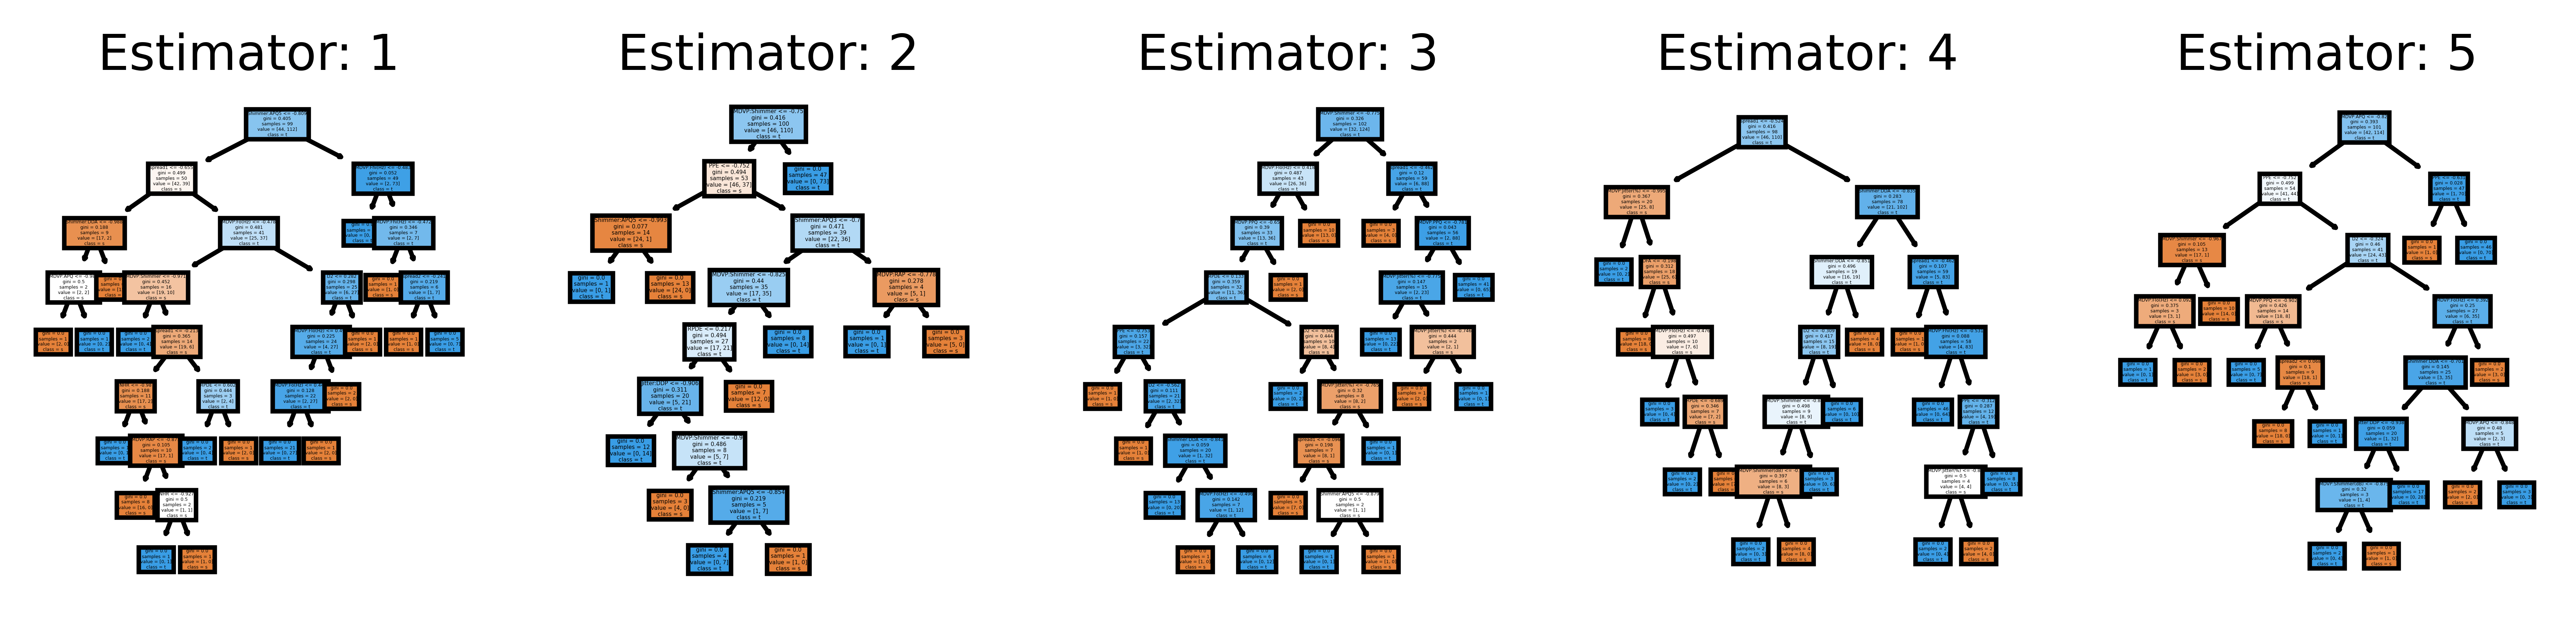

In [ ]:
#plot the RandomForestClassifier’s first 5 trees
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(model.estimators_[index],feature_names= features.columns,
 class_names= 'status',filled = True,ax = axes[index])
    axes[index].set_title('Estimator: ' + str(index+1), fontsize = 11)
fig.savefig('Random Forest 5 Trees.png')

In [ ]:
#predict the output for x_test
y_pred=model.predict(x_test)

#calculate accuracy,root mean squared error
print('Accuracy :',accuracy_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Accuracy : 0.9743589743589743
Mean Absolute Error: 0.02564102564102564
Root Mean Squared Error: 0.16012815380508713
